In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

sns.set_context('paper', font_scale=1.3)

In [2]:
df_fin = pd.read_csv('data/data_fin.csv', index_col=0)
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21273 entries, 0 to 21272
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21273 non-null  float64
 1   bathrooms           21273 non-null  float64
 2   sqft_living         21273 non-null  int64  
 3   sqft_lot            21273 non-null  int64  
 4   floors              21273 non-null  float64
 5   waterfront          21273 non-null  float64
 6   yr_built            21273 non-null  int64  
 7   zipcode             21273 non-null  int64  
 8   lat                 21273 non-null  float64
 9   long                21273 non-null  float64
 10  sqft_living15       21273 non-null  int64  
 11  sqft_lot15          21273 non-null  int64  
 12  month               21273 non-null  int64  
 13  yrs_since_reno      21273 non-null  int64  
 14  bed_bath_ratio      21273 non-null  float64
 15  bedrooms_5plus      21273 non-null  int64  
 16  grad

### More outliers

#### sqft_lot

In [3]:
#Finding a cutoff point
for i in range(90, 101):
    q = i / 100
    print('{} percentile: {}'.format(q, df_fin['sqft_lot'].quantile(q=q)))

0.9 percentile: 21272.39999999999
0.91 percentile: 23940.080000000013
0.92 percentile: 28212.24
0.93 percentile: 34526.44000000004
0.94 percentile: 37369.8
0.95 percentile: 43068.79999999993
0.96 percentile: 50126.83999999997
0.97 percentile: 66151.00000000006
0.98 percentile: 104352.16000000057
0.99 percentile: 210293.19999999984
1.0 percentile: 715690.0


In [4]:
df_fin[df_fin['sqft_lot'] > 300000].head()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,lat,long,...,city_Medina,city_Mercer_Island,city_North_Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
144,921500.0,2.50,3670,315374,2.0,0.0,1994,98077,47.7421,-122.026,...,0,0,0,0,0,0,0,0,0,1
1673,617000.0,1.75,3020,360241,2.0,0.0,1992,98092,47.2662,-122.088,...,0,0,0,0,0,0,0,0,0,0
1743,210000.0,1.00,1340,306848,1.0,0.0,1953,98019,47.7534,-121.912,...,0,0,0,0,0,0,0,0,0,0
2708,230000.0,1.00,1530,389126,1.5,0.0,1919,98022,47.1776,-122.011,...,0,0,0,0,0,0,0,0,0,0
2822,302000.0,1.00,900,423838,1.0,0.0,1925,98022,47.2280,-122.088,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_fin = df_fin[df_fin['sqft_lot'] <= 300000]

#### sqft_lot15

In [6]:
for i in range(90, 101):
    q = i / 100
    print('{} percentile: {}'.format(q, df_fin['sqft_lot15'].quantile(q=q)))

0.9 percentile: 17221.800000000003
0.91 percentile: 19250.0
0.92 percentile: 21502.279999999984
0.93 percentile: 26028.350000000002
0.94 percentile: 33959.61999999995
0.95 percentile: 36264.399999999965
0.96 percentile: 40635.0
0.97 percentile: 48943.77000000015
0.98 percentile: 68772.2599999996
0.99 percentile: 124847.08999999867
1.0 percentile: 438213.0


In [7]:
df_fin[df_fin['sqft_lot15'] > 350000]

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,lat,long,...,city_Medina,city_Mercer_Island,city_North_Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
3735,637000.0,3.50,3080,118918,2.0,0.0,2008,98019,47.7721,-121.924,...,0,0,0,0,0,0,0,0,0,0
8522,549950.0,1.75,2930,266587,2.0,0.0,1995,98014,47.6991,-121.947,...,0,0,0,0,0,0,0,0,0,0
10991,319000.0,1.75,1640,53400,1.0,0.0,1966,98070,47.3944,-122.506,...,0,0,0,0,0,0,0,0,1,0
11364,350000.0,1.75,1680,250470,1.0,0.0,1940,98019,47.7624,-121.930,...,0,0,0,0,0,0,0,0,0,0
15350,180000.0,1.00,960,87991,1.5,0.0,1946,98014,47.6300,-121.900,...,0,0,0,0,0,0,0,0,0,0
17358,370000.0,1.00,2360,105850,1.0,0.0,1947,98022,47.2495,-121.970,...,0,0,0,0,0,0,0,0,0,0
21094,800000.0,3.25,3540,159430,2.0,0.0,2007,98014,47.6285,-121.899,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_fin = df_fin[df_fin['sqft_lot15'] <= 350000]

#### Price

In [9]:
for i in range(90, 101):
    q = i / 100
    print('{} percentile: {}'.format(q, df_fin['price'].quantile(q=q)))

0.9 percentile: 887350.0000000003
0.91 percentile: 920000.0
0.92 percentile: 950000.0
0.93 percentile: 997979.0000000001
0.94 percentile: 1060000.0
0.95 percentile: 1160000.0
0.96 percentile: 1250000.0
0.97 percentile: 1390000.0
0.98 percentile: 1600000.0
0.99 percentile: 1950000.0
1.0 percentile: 4670000.0


In [10]:
for i in range(0, 10):
    q = i / 100
    print('{} percentile: {}'.format(q, df_fin['price'].quantile(q=q)))

0.0 percentile: 78000.0
0.01 percentile: 159004.5
0.02 percentile: 180000.0
0.03 percentile: 195753.99999999997
0.04 percentile: 205000.0
0.05 percentile: 215000.0
0.06 percentile: 221474.07999999996
0.07 percentile: 229950.0
0.08 percentile: 235000.0
0.09 percentile: 242000.0


In [11]:
df_fin = df_fin[df_fin['price'] >= 120000]

In [12]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21272
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21158 non-null  float64
 1   bathrooms           21158 non-null  float64
 2   sqft_living         21158 non-null  int64  
 3   sqft_lot            21158 non-null  int64  
 4   floors              21158 non-null  float64
 5   waterfront          21158 non-null  float64
 6   yr_built            21158 non-null  int64  
 7   zipcode             21158 non-null  int64  
 8   lat                 21158 non-null  float64
 9   long                21158 non-null  float64
 10  sqft_living15       21158 non-null  int64  
 11  sqft_lot15          21158 non-null  int64  
 12  month               21158 non-null  int64  
 13  yrs_since_reno      21158 non-null  int64  
 14  bed_bath_ratio      21158 non-null  float64
 15  bedrooms_5plus      21158 non-null  int64  
 16  grad

### Split and transform data

In [13]:
train, test = train_test_split(df_fin, test_size=0.25, random_state=25)
print(len(train), len(test))

15868 5290


In [14]:
train.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month', 'yrs_since_reno', 'bed_bath_ratio', 'bedrooms_5plus',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'view_1_2', 'view_3', 'view_4',
       'condition_3_4', 'condition_5', 'city', 'city_Bellevue',
       'city_Black_Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall_City', 'city_Federal_Way', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Maple_Valley',
       'city_Medina', 'city_Mercer_Island', 'city_North_Bend', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_Seattle', 'city_Snoqualmie',
       'city_Vashon', 'city_Woodinville'],
      dtype='object')

In [15]:
plot_columns = ['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month', 'yrs_since_reno', 'bed_bath_ratio']
len(plot_columns)

15

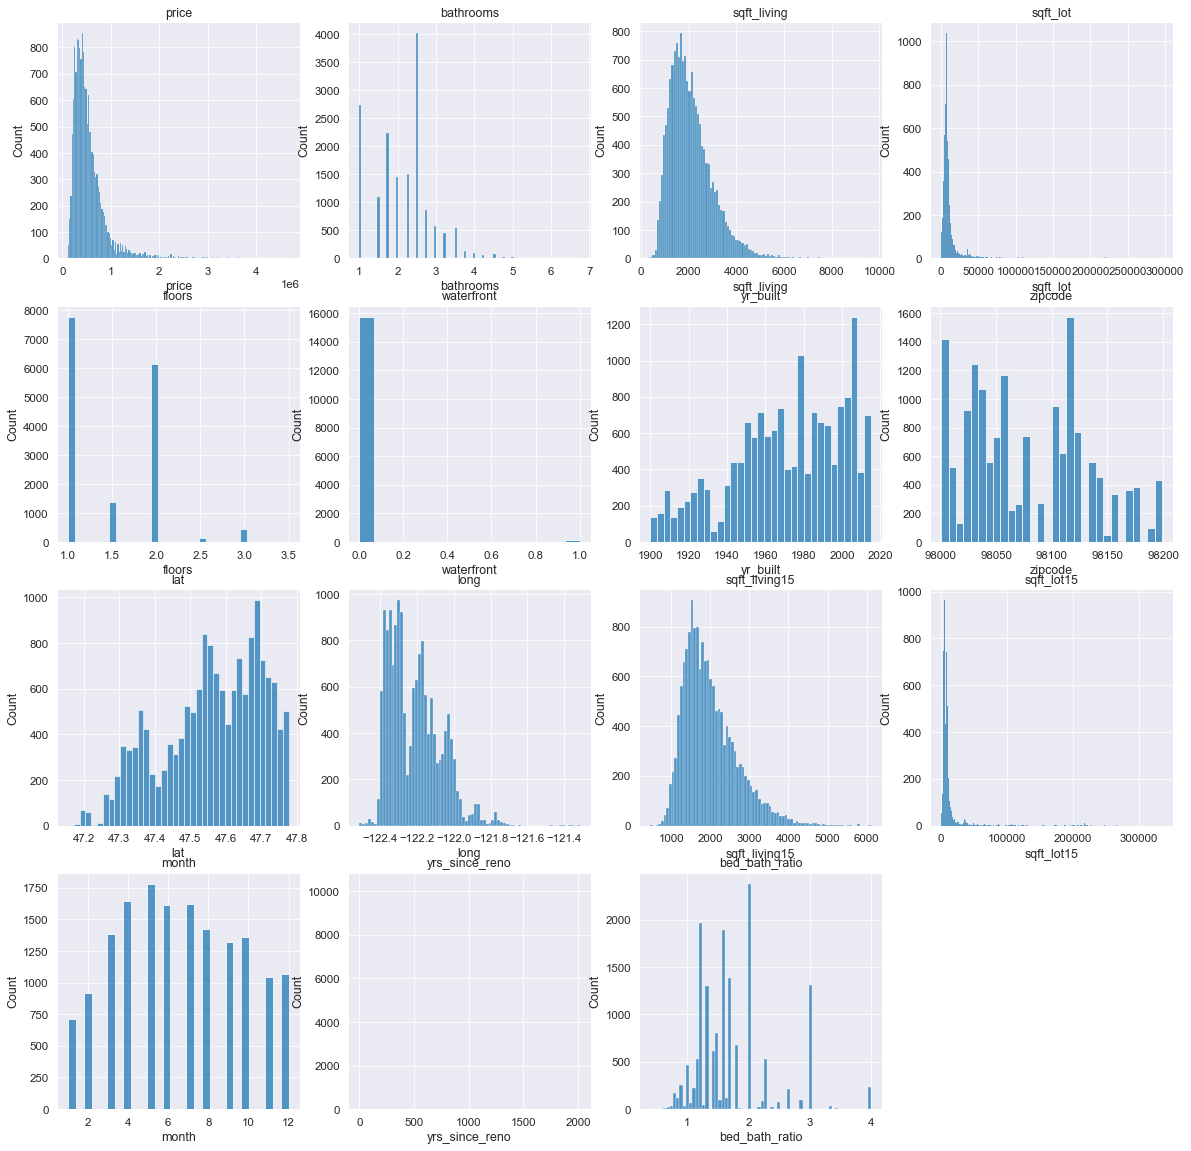

In [16]:
plt.figure(figsize=(20,20))

for index, col in enumerate(plot_columns):
    ax = plt.subplot(4, 4, index+1)
    sns.histplot(x=col, data=train, ax=ax)
    ax.set_title('{}'.format(col))

In [17]:
def log_diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    plt.figure(figsize=(12, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(np.log(df[variable]), bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=np.log(df[variable]))
    plt.title('Boxplot')

    plt.show()

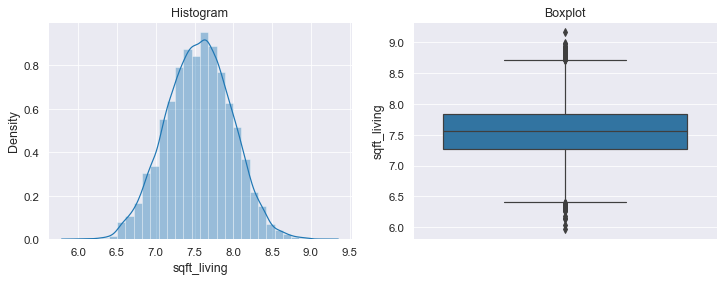

In [18]:
log_diagnostic_plots(train, 'sqft_living')

In [19]:
to_log = ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']

In [20]:
df_log = pd.DataFrame([])
for col in to_log:
    df_log[col] = np.log(train[col])
df_log = df_log.add_prefix('log_')
df_temp = train.drop(to_log, axis=1)

In [21]:
train2 = pd.concat([df_log, df_temp], axis=1)

In [22]:
train2.columns

Index(['log_price', 'log_sqft_living', 'log_sqft_lot', 'log_sqft_living15',
       'log_sqft_lot15', 'bathrooms', 'floors', 'waterfront', 'yr_built',
       'zipcode', 'lat', 'long', 'month', 'yrs_since_reno', 'bed_bath_ratio',
       'bedrooms_5plus', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'view_1_2', 'view_3',
       'view_4', 'condition_3_4', 'condition_5', 'city', 'city_Bellevue',
       'city_Black_Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall_City', 'city_Federal_Way', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Maple_Valley',
       'city_Medina', 'city_Mercer_Island', 'city_North_Bend', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_Seattle', 'city_Snoqualmie',
       'city_Vashon', 'city_Woodinville'],
      dtype='object')

### Decisions

Outlier removal:
- sqft_lot over 300,000
- sqft_lot15 over 350,000
- price under 120,000

log-transformations:
- 'price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15'

## Model 5

In [23]:
outcome = 'log_price'
cols = list(train2.columns)
unwanted = ['log_price', 'zipcode', 'city']
x_cols = [e for e in cols if e not in unwanted]

In [24]:
pred_sum = '+'.join(train2[x_cols])
formula = outcome + '~' + pred_sum
model5 = ols(formula=formula, data=train2).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     1424.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:43:45   Log-Likelihood:                 1631.4
No. Observations:               15868   AIC:                            -3159.
Df Residuals:                   15816   BIC:                            -2760.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -120.1635      5.315    -22.608      0.000    -130.582    -109.745
log_sqft_living        0.3352      0.009     36.305      0.000       0.317       0.353
log_sqft_lot           0.0361      0.005      6.923      0.000       0.026       0.046
log_sqft_living15      0.2045      0.009     21.749      0.000       0.186       0.223
log_sqft_lot15        -0.0503      0.006     -8.876      0.000      -0.061      -0.039
bathrooms              0.0321      0.006      5.834      0.000       0.021       0.043
floors                 0.0578      0.004     12.872      0.000       0.049       0.067
waterfront             0.3295      0.024     13.666      0.000       0.282       0.377
yr_built              -0.0031   9.43e-05    -33.195      0.000      -0.003      -0.003
lat                    1.2662      0.028     45.792      0.000       1.212       1.320
long                  -0.6106      0.043    -14.309      0.000      -0.694      -0.527
month                 -0.0055      0.001     -9.842      0.000      -0.007      -0.004
yrs_since_reno     -1.998e-05   5.03e-06     -3.969      0.000   -2.98e-05   -1.01e-05
bed_bath_ratio        -0.0308      0.005     -6.739      0.000      -0.040      -0.022
bedrooms_5plus        -0.0099      0.007     -1.334      0.182      -0.024       0.005
grade_5                0.0616      0.075      0.818      0.413      -0.086       0.209
grade_6                0.1256      0.073      1.710      0.087      -0.018       0.270
grade_7                0.2479      0.073      3.373      0.001       0.104       0.392
grade_8                0.3773      0.074      5.121      0.000       0.233       0.522
grade_9                0.5533      0.074      7.475      0.000       0.408       0.698
grade_10               0.6839      0.074      9.187      0.000       0.538       0.830
grade_11               0.8334      0.075     11.055      0.000       0.686       0.981
grade_12               0.9917      0.079     12.490      0.000       0.836       1.147
grade_13               1.2413      0.112     11.122      0.000       1.023       1.460
view_1_2               0.0993      0.008     12.944      0.000       0.084       0.114
view_3                 0.1399      0.012     11.706      0.000       0.116       0.163
view_4                 0.2637      0.018     14.659      0.000       0.228       0.299
condition_3_4          0.1121      0.019      5.829      0.000       0.074       0.150
condition_5            0.1992      0.020      9.894      0.000       0.160       0.239
city_Bellevue          0.3574      0.014     25.642      0.000       0.330       0.385
city_Black_Diamond     0.3734      0.028     13.172      0.000       0.318       0.429
city_Bothell          -0.1591      0.023     -6.882      0.000      -0.204      -0.114
city_Carnation         0.1072      0.0

### Observations
- JB value is lowest so far
- high p-values: bedrooms_5plus, grade_5, grade_6 (not so bad), city_KENT

### Normality check

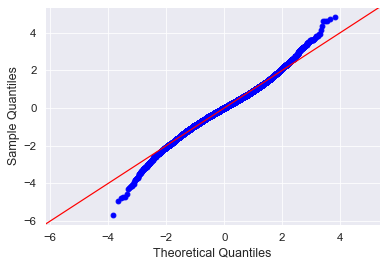

In [25]:
resid5 = model5.resid
fig = sm.graphics.qqplot(resid5, dist=stats.norm, line='45', fit=True)

### Homoscedasticity check

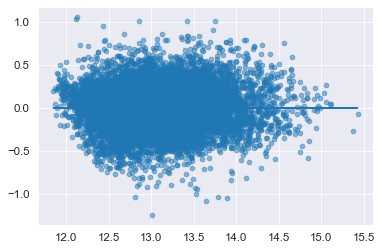

In [26]:
plt.scatter(model5.predict(train2[x_cols]), model5.resid, alpha=0.5)
plt.plot(model5.predict(train2[x_cols]), [0 for i in range(len(train2))])

The residuals no longer form a cone shape

### RMSE

In [27]:
test.columns

Index(['price', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'month', 'yrs_since_reno', 'bed_bath_ratio', 'bedrooms_5plus',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'view_1_2', 'view_3', 'view_4',
       'condition_3_4', 'condition_5', 'city', 'city_Bellevue',
       'city_Black_Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall_City', 'city_Federal_Way', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Maple_Valley',
       'city_Medina', 'city_Mercer_Island', 'city_North_Bend', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_Seattle', 'city_Snoqualmie',
       'city_Vashon', 'city_Woodinville'],
      dtype='object')

In [28]:
test_log = pd.DataFrame([])
for col in to_log:
    test_log[col] = np.log(test[col])
test_log = test_log.add_prefix('log_')
test_temp = test.drop(to_log, axis=1)
test2 = pd.concat([test_log, test_temp], axis=1)
test2.columns

Index(['log_price', 'log_sqft_living', 'log_sqft_lot', 'log_sqft_living15',
       'log_sqft_lot15', 'bathrooms', 'floors', 'waterfront', 'yr_built',
       'zipcode', 'lat', 'long', 'month', 'yrs_since_reno', 'bed_bath_ratio',
       'bedrooms_5plus', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'view_1_2', 'view_3',
       'view_4', 'condition_3_4', 'condition_5', 'city', 'city_Bellevue',
       'city_Black_Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall_City', 'city_Federal_Way', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Maple_Valley',
       'city_Medina', 'city_Mercer_Island', 'city_North_Bend', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_Seattle', 'city_Snoqualmie',
       'city_Vashon', 'city_Woodinville'],
      dtype='object')

In [29]:
X_train = train2[x_cols]
Y_train = train2['log_price']
X_test = test2[x_cols]
Y_test = test2['log_price']

In [30]:
linreg5 = LinearRegression()
linreg5.fit(X_train, Y_train)
Y_pred = linreg5.predict(X_test)

In [31]:
mse_train = mean_squared_error(Y_train, linreg5.predict(X_train))
mse_test = mean_squared_error(Y_test, Y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.21832933895441853
Test RMSE: 0.22370861538214185


In [32]:
type(Y_train)

pandas.core.series.Series

In [33]:
mse_train_nolog = mean_squared_error(np.exp(Y_train), np.exp(linreg5.predict(X_train)))
mse_test_nolog = mean_squared_error(np.exp(Y_test), np.exp(Y_pred))
                                     
print("Non-log Train RMSE:", np.sqrt(mse_train_nolog))
print("Non-log Test RMSE:", np.sqrt(mse_test_nolog))

Non-log Train RMSE: 156988.56485537402
Non-log Test RMSE: 156421.7560918673


In [34]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21158 entries, 0 to 21272
Data columns (total 54 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21158 non-null  float64
 1   bathrooms           21158 non-null  float64
 2   sqft_living         21158 non-null  int64  
 3   sqft_lot            21158 non-null  int64  
 4   floors              21158 non-null  float64
 5   waterfront          21158 non-null  float64
 6   yr_built            21158 non-null  int64  
 7   zipcode             21158 non-null  int64  
 8   lat                 21158 non-null  float64
 9   long                21158 non-null  float64
 10  sqft_living15       21158 non-null  int64  
 11  sqft_lot15          21158 non-null  int64  
 12  month               21158 non-null  int64  
 13  yrs_since_reno      21158 non-null  int64  
 14  bed_bath_ratio      21158 non-null  float64
 15  bedrooms_5plus      21158 non-null  int64  
 16  grad

### Multicolinearity Check

In [35]:
corr = pd.concat([X_train, Y_train], axis=1).corr()

<AxesSubplot:>

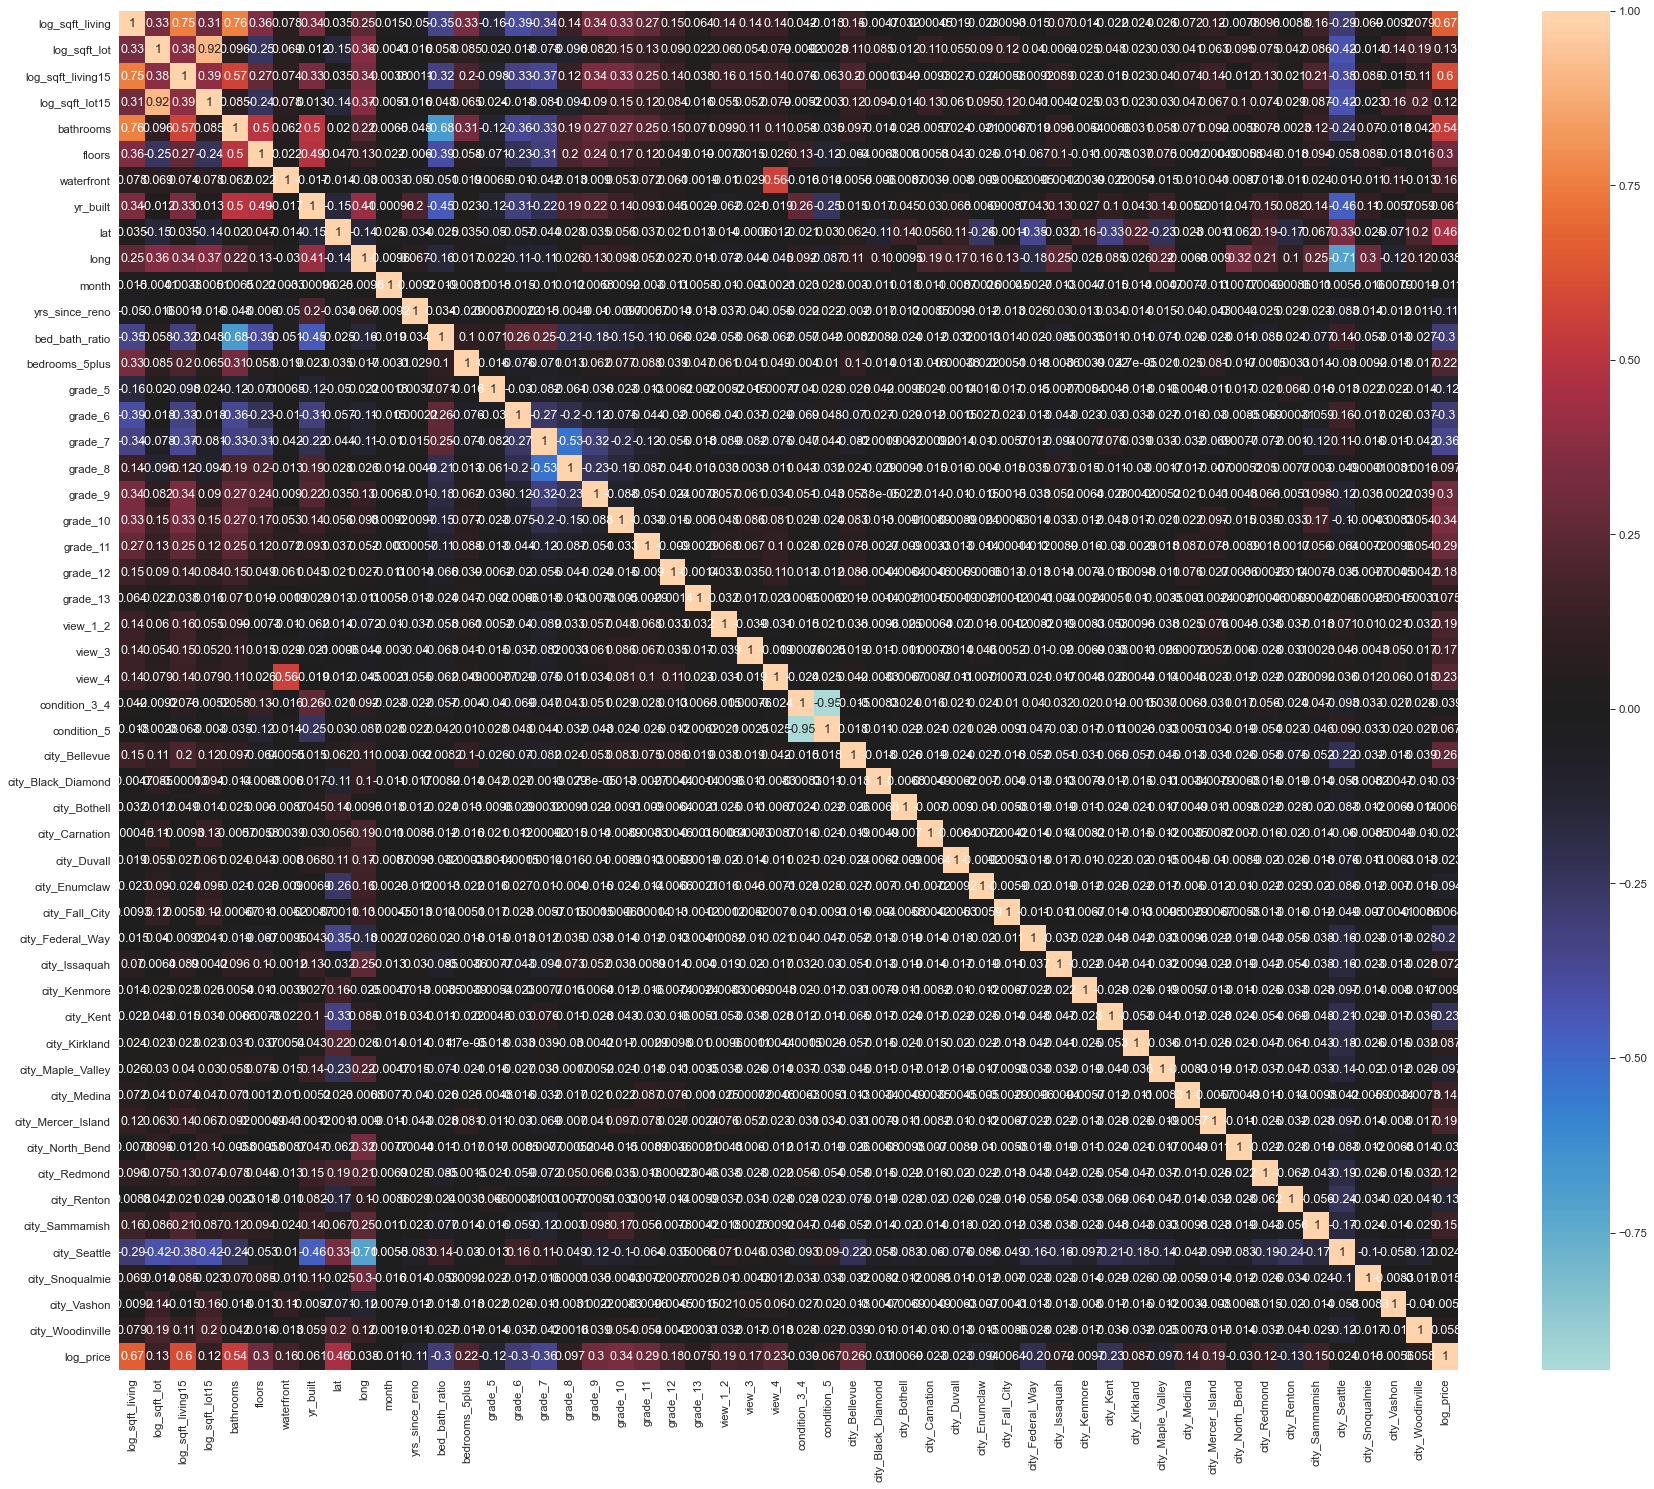

In [36]:
plt.figure(figsize=(30,25))
sns.heatmap(data = corr, center= 0, annot= True)

Multicolinear features:
- bathrooms & log_sqft_living
- log_sqft_lot15 & log_sqft_lot
- log_sqft_living & log_sqft_living15 (0.75)
- condition_3_4 & condition_5

### Drop more features

In [37]:
# split original data
train, test = train_test_split(df_fin, test_size=0.25, random_state=25)

to_log = ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']

# log transform train data
df_log = pd.DataFrame([])
for col in to_log:
    df_log[col] = np.log(train[col])
df_log = df_log.add_prefix('log_')
df_temp = train.drop(to_log, axis=1)
train2 = pd.concat([df_log, df_temp], axis=1)

#log transform test data
test_log = pd.DataFrame([])
for col in to_log:
    test_log[col] = np.log(test[col])
test_log = test_log.add_prefix('log_')
test_temp = test.drop(to_log, axis=1)
test2 = pd.concat([test_log, test_temp], axis=1)


In [38]:
# x_cols will contain relevant features
outcome = 'log_price'
cols = list(train2.columns)
unwanted = ['log_price', 'zipcode', 'city', 'bedrooms_5plus', 'grade_5', 'city_Kent', 'bathrooms', 'log_sqft_lot15', 'condition_3_4' ]
x_cols = [e for e in cols if e not in unwanted]

### Decisions
Drop multicolinear features:
- bathrooms
- log_sqft_lot15
- condition_3_4

Drop high p-value features:
- bedrooms_5plus
- grade_5
- city_Kent

## Model 6

In [39]:
pred_sum = '+'.join(train2[x_cols])
formula = outcome + '~' + pred_sum
model6 = ols(formula=formula, data=train2).fit()
model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1596.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:44:05   Log-Likelihood:                 1556.3
No. Observations:               15868   AIC:                            -3021.
Df Residuals:                   15822   BIC:                            -2668.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -123.6816      5.265    -23.491      0.000    -134.002    -113.362
log_sqft_living        0.3726      0.007     49.903      0.000       0.358       0.387
log_sqft_lot          -0.0043      0.003     -1.516      0.129      -0.010       0.001
log_sqft_living15      0.1892      0.009     20.267      0.000       0.171       0.207
floors                 0.0642      0.004     14.466      0.000       0.055       0.073
waterfront             0.3209      0.024     13.258      0.000       0.273       0.368
yr_built              -0.0030   9.31e-05    -32.713      0.000      -0.003      -0.003
lat                    1.2693      0.027     46.404      0.000       1.216       1.323
long                  -0.6368      0.042    -15.183      0.000      -0.719      -0.555
month                 -0.0055      0.001     -9.860      0.000      -0.007      -0.004
yrs_since_reno       -2.1e-05   5.05e-06     -4.162      0.000   -3.09e-05   -1.11e-05
bed_bath_ratio        -0.0481      0.003    -14.180      0.000      -0.055      -0.041
grade_6                0.0692      0.019      3.692      0.000       0.032       0.106
grade_7                0.1928      0.018     10.422      0.000       0.157       0.229
grade_8                0.3225      0.019     16.733      0.000       0.285       0.360
grade_9                0.4963      0.020     24.317      0.000       0.456       0.536
grade_10               0.6289      0.022     28.760      0.000       0.586       0.672
grade_11               0.7863      0.025     31.672      0.000       0.738       0.835
grade_12               0.9507      0.035     27.087      0.000       0.882       1.020
grade_13               1.2126      0.086     14.069      0.000       1.044       1.382
view_1_2               0.1003      0.008     13.017      0.000       0.085       0.115
view_3                 0.1417      0.012     11.807      0.000       0.118       0.165
view_4                 0.2644      0.018     14.632      0.000       0.229       0.300
condition_5            0.0901      0.007     13.269      0.000       0.077       0.103
city_Bellevue          0.3645      0.011     31.951      0.000       0.342       0.387
city_Black_Diamond     0.3741      0.027     13.704      0.000       0.321       0.428
city_Bothell          -0.1538      0.022     -7.113      0.000      -0.196      -0.111
city_Carnation         0.1011      0.031      3.304      0.001       0.041       0.161
city_Duvall           -0.0590      0.025     -2.366      0.018      -0.108      -0.010
city_Enumclaw          0.3202      0.020     15.877      0.000       0.281       0.360
city_Fall_City         0.3557      0.033     10.666      0.000       0.290       0.421
city_Federal_Way      -0.1248      0.013     -9.869      0.000      -0.150      -0.100
city_Issaquah          0.3131      0.0

Observations:

log_sqft_lot and city_Vashon have high p-values

### Normality check

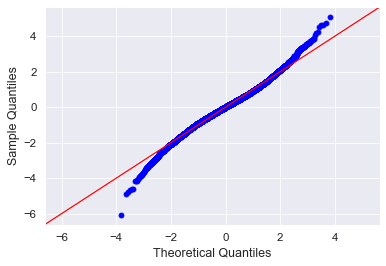

In [40]:
resid6 = model6.resid
fig = sm.graphics.qqplot(resid6, dist=stats.norm, line='45', fit=True)

### Homoscedasticity check

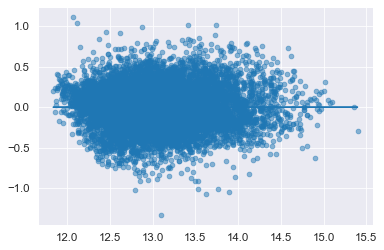

In [41]:
plt.scatter(model6.predict(train2[x_cols]), model6.resid, alpha=0.5)
plt.plot(model6.predict(train2[x_cols]), [0 for i in range(len(train2))])

### Distributions Pre and Post-Log

In [42]:
x_cols

['log_sqft_living',
 'log_sqft_lot',
 'log_sqft_living15',
 'floors',
 'waterfront',
 'yr_built',
 'lat',
 'long',
 'month',
 'yrs_since_reno',
 'bed_bath_ratio',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'view_1_2',
 'view_3',
 'view_4',
 'condition_5',
 'city_Bellevue',
 'city_Black_Diamond',
 'city_Bothell',
 'city_Carnation',
 'city_Duvall',
 'city_Enumclaw',
 'city_Fall_City',
 'city_Federal_Way',
 'city_Issaquah',
 'city_Kenmore',
 'city_Kirkland',
 'city_Maple_Valley',
 'city_Medina',
 'city_Mercer_Island',
 'city_North_Bend',
 'city_Redmond',
 'city_Renton',
 'city_Sammamish',
 'city_Seattle',
 'city_Snoqualmie',
 'city_Vashon',
 'city_Woodinville']

In [43]:
to_plot1 = ['price', 'sqft_living',
 'sqft_lot',
 'sqft_living15',
 'sqft_lot15']

In [44]:
to_plot2 = ['log_price', 'log_sqft_living',
 'log_sqft_lot',
 'log_sqft_living15',
 'log_sqft_lot15']
len(to_plot2)

5

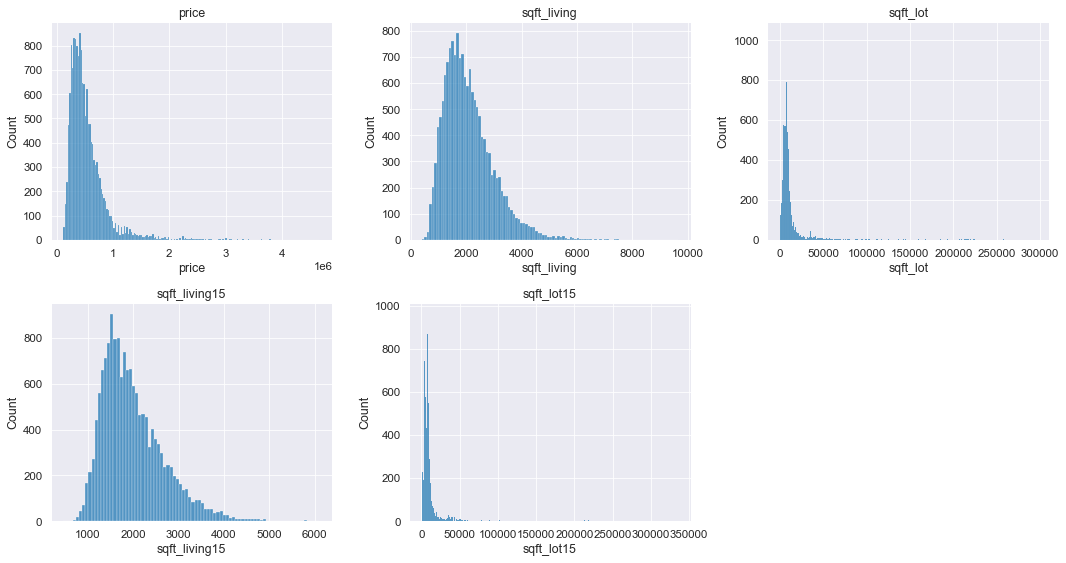

In [45]:
plt.figure(figsize=(15,8))

for index, col in enumerate(to_plot1):
    ax = plt.subplot(2, 3, index+1)
    sns.histplot(x=col, data=train, ax=ax)
    ax.set_title('{}'.format(col))
plt.tight_layout()
plt.savefig('images/pre-log.png')

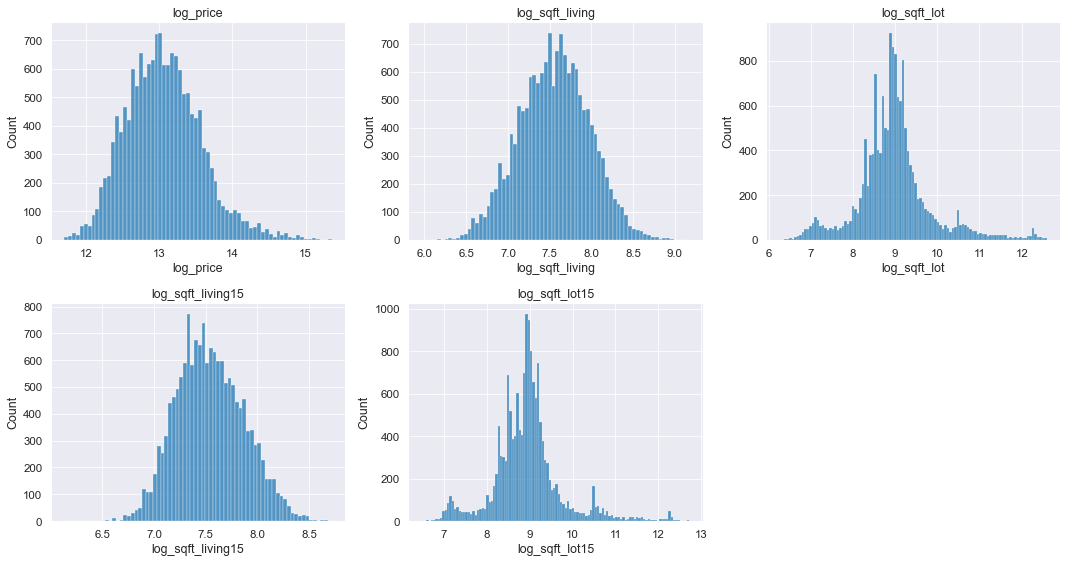

In [46]:
plt.figure(figsize=(15, 8))

for index, col in enumerate(to_plot2):
    ax = plt.subplot(2, 3, index+1)
    sns.histplot(x=col, data=train2, ax=ax)
    ax.set_title('{}'.format(col))
plt.tight_layout()
plt.savefig('images/post-log.png')

### RMSE

In [47]:
X_train = train2[x_cols]
Y_train = train2['log_price']
X_test = test2[x_cols]
Y_test = test2['log_price']

In [48]:
linreg6 = LinearRegression()
linreg6.fit(X_train, Y_train)
Y_pred = linreg6.predict(X_test)

In [49]:
mse_train = mean_squared_error(Y_train, linreg6.predict(X_train))
mse_test = mean_squared_error(Y_test, Y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.21936532516706908
Test RMSE: 0.22384924846934712


In [50]:
mse_train_nolog = mean_squared_error(np.exp(Y_train), np.exp(linreg6.predict(X_train)))
mse_test_nolog = mean_squared_error(np.exp(Y_test), np.exp(Y_pred))
                                     
print("Non-log Train RMSE:", np.sqrt(mse_train_nolog))
print("Non-log Test RMSE:", np.sqrt(mse_test_nolog))

Non-log Train RMSE: 158121.16853377706
Non-log Test RMSE: 156846.5562363064


### Multicolinearity check

In [51]:
corr = pd.concat([X_train, Y_train], axis=1).corr()

<AxesSubplot:>

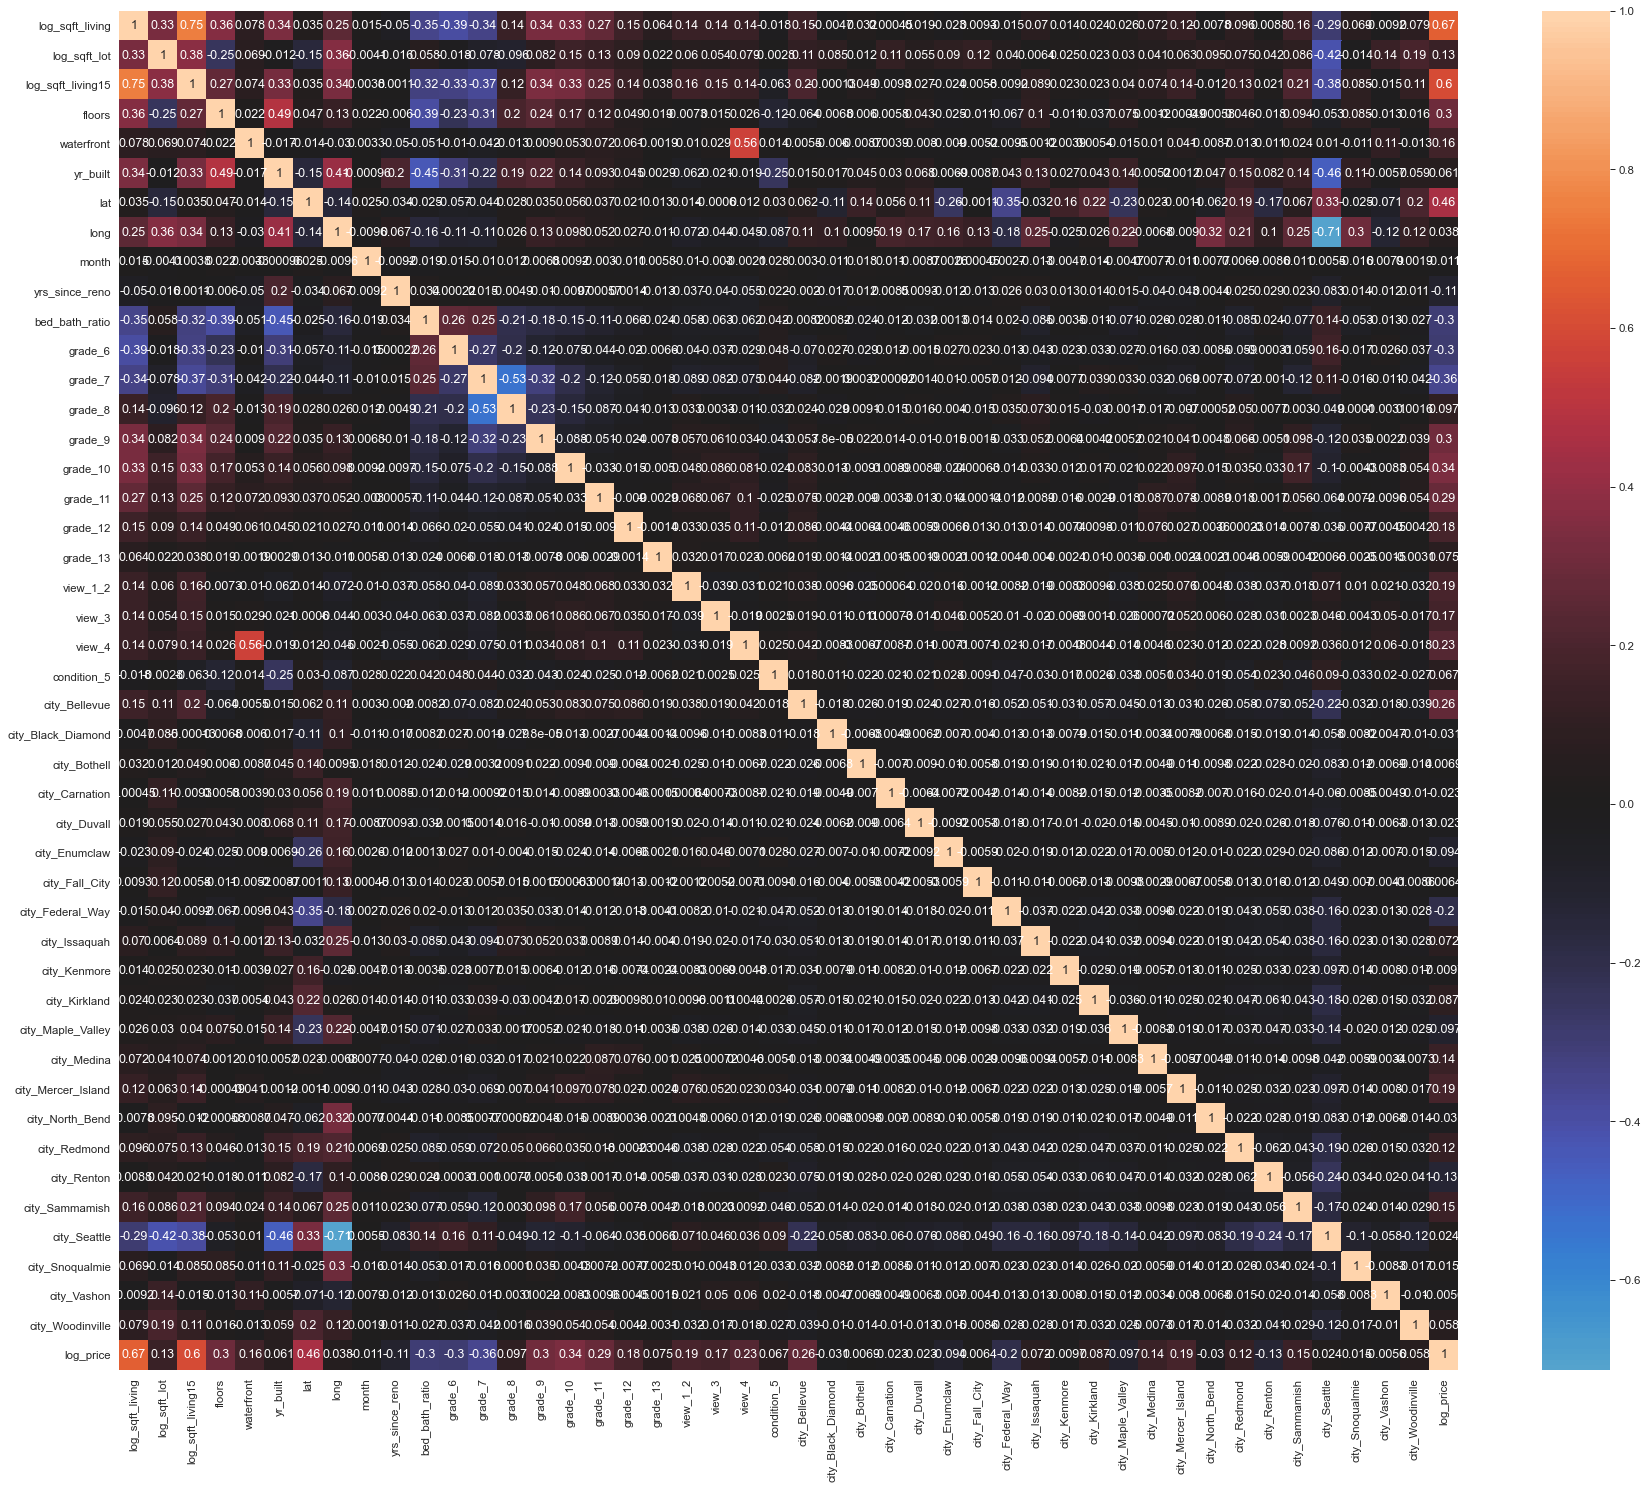

In [52]:
plt.figure(figsize=(30,25))
sns.heatmap(data = corr, center= 0, annot= True)

#### Observations
- log_sqft_living and log_sqft_living15 at cutoff value

### Decisions
Drop high p-value features
- log_sqft_lot and city_Vashon

## Model 7

In [53]:
# x_cols will contain relevant features. Use same test-train split as previous model
outcome = 'log_price'
cols = list(train2.columns)
unwanted = ['log_price', 'zipcode', 'city', 'bedrooms_5plus', 'grade_5', 'city_Kent', 'bathrooms', 'log_sqft_lot15',
            'condition_3_4', 'log_sqft_lot', 'city_Vashon']
x_cols = [e for e in cols if e not in unwanted]

In [54]:
pred_sum = '+'.join(train2[x_cols])
formula = outcome + '~' + pred_sum
model7 = ols(formula=formula, data=train2).fit()
model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     1670.
Date:                Wed, 09 Jun 2021   Prob (F-statistic):               0.00
Time:                        21:44:33   Log-Likelihood:                 1553.8
No. Observations:               15868   AIC:                            -3020.
Df Residuals:                   15824   BIC:                            -2682.
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -128.3740      4.772    -26.899      0.000    -137.729    -119.019
log_sqft_living        0.3702      0.007     50.880      0.000       0.356       0.385
log_sqft_living15      0.1871      0.009     20.240      0.000       0.169       0.205
floors                 0.0664      0.004     15.912      0.000       0.058       0.075
waterfront             0.3237      0.024     13.424      0.000       0.276       0.371
yr_built              -0.0030   9.22e-05    -32.811      0.000      -0.003      -0.003
lat                    1.2755      0.027     46.877      0.000       1.222       1.329
long                  -0.6724      0.038    -17.576      0.000      -0.747      -0.597
month                 -0.0055      0.001     -9.858      0.000      -0.007      -0.004
yrs_since_reno     -2.106e-05   5.05e-06     -4.173      0.000   -3.09e-05   -1.12e-05
bed_bath_ratio        -0.0486      0.003    -14.385      0.000      -0.055      -0.042
grade_6                0.0694      0.019      3.702      0.000       0.033       0.106
grade_7                0.1930      0.018     10.443      0.000       0.157       0.229
grade_8                0.3228      0.019     16.763      0.000       0.285       0.361
grade_9                0.4962      0.020     24.320      0.000       0.456       0.536
grade_10               0.6278      0.022     28.716      0.000       0.585       0.671
grade_11               0.7846      0.025     31.614      0.000       0.736       0.833
grade_12               0.9479      0.035     27.023      0.000       0.879       1.017
grade_13               1.2094      0.086     14.032      0.000       1.040       1.378
view_1_2               0.1005      0.008     13.039      0.000       0.085       0.116
view_3                 0.1428      0.012     11.911      0.000       0.119       0.166
view_4                 0.2638      0.018     14.602      0.000       0.228       0.299
condition_5            0.0907      0.007     13.370      0.000       0.077       0.104
city_Bellevue          0.3636      0.011     32.019      0.000       0.341       0.386
city_Black_Diamond     0.3757      0.027     13.804      0.000       0.322       0.429
city_Bothell          -0.1575      0.022     -7.313      0.000      -0.200      -0.115
city_Carnation         0.1044      0.030      3.445      0.001       0.045       0.164
city_Duvall           -0.0567      0.025     -2.282      0.022      -0.105      -0.008
city_Enumclaw          0.3237      0.020     16.141      0.000       0.284       0.363
city_Fall_City         0.3571      0.033     10.782      0.000       0.292       0.422
city_Federal_Way      -0.1312      0.012    -10.832      0.000      -0.155      -0.108
city_Issaquah          0.3166      0.014     22.800      0.000       0.289       0.344
city_Kenmore          -0.2134      0.0

Observations:
All p-values are under 0.05.

### Relationships with Housing Prices
Looking at features within the data that exhibit relatively strong relationships with housing prices

#### latitude
Price was log-tranformed while latitude was not. A coefficient of 1.2755 means that a 1 unit increase in latitude is associated with a 127.5% increase in price

#### waterfront
A coefficient of 0.3237 means that houses on the waterfront are 32.4% more than houses without a waterfront.

#### grade_13
A coefficient of 1.2094 means that, compared to grade_5 homes (the dropped dummy variable), grade_13 homes are ~121% more

### RMSE

In [55]:
X_train = train2[x_cols]
Y_train = train2['log_price']
X_test = test2[x_cols]
Y_test = test2['log_price']

In [56]:
linreg7 = LinearRegression()
linreg7.fit(X_train, Y_train)
Y_pred = linreg7.predict(X_test)

In [57]:
mse_train = mean_squared_error(Y_train, linreg7.predict(X_train))
mse_test = mean_squared_error(Y_test, Y_pred)

print("Train RMSE:", np.sqrt(mse_train))
print("Test RMSE:", np.sqrt(mse_test))

Train RMSE: 0.21940044415671037
Test RMSE: 0.2238591973919795


In [58]:
mse_train_nolog = mean_squared_error(np.exp(Y_train), np.exp(linreg7.predict(X_train)))
mse_test_nolog = mean_squared_error(np.exp(Y_test), np.exp(Y_pred))
                                     
print("Non-log Train RMSE:", np.sqrt(mse_train_nolog))
print("Non-log Test RMSE:", np.sqrt(mse_test_nolog))

Non-log Train RMSE: 158178.96740044517
Non-log Test RMSE: 156898.73060194094


### Multicolinearity check

<AxesSubplot:>

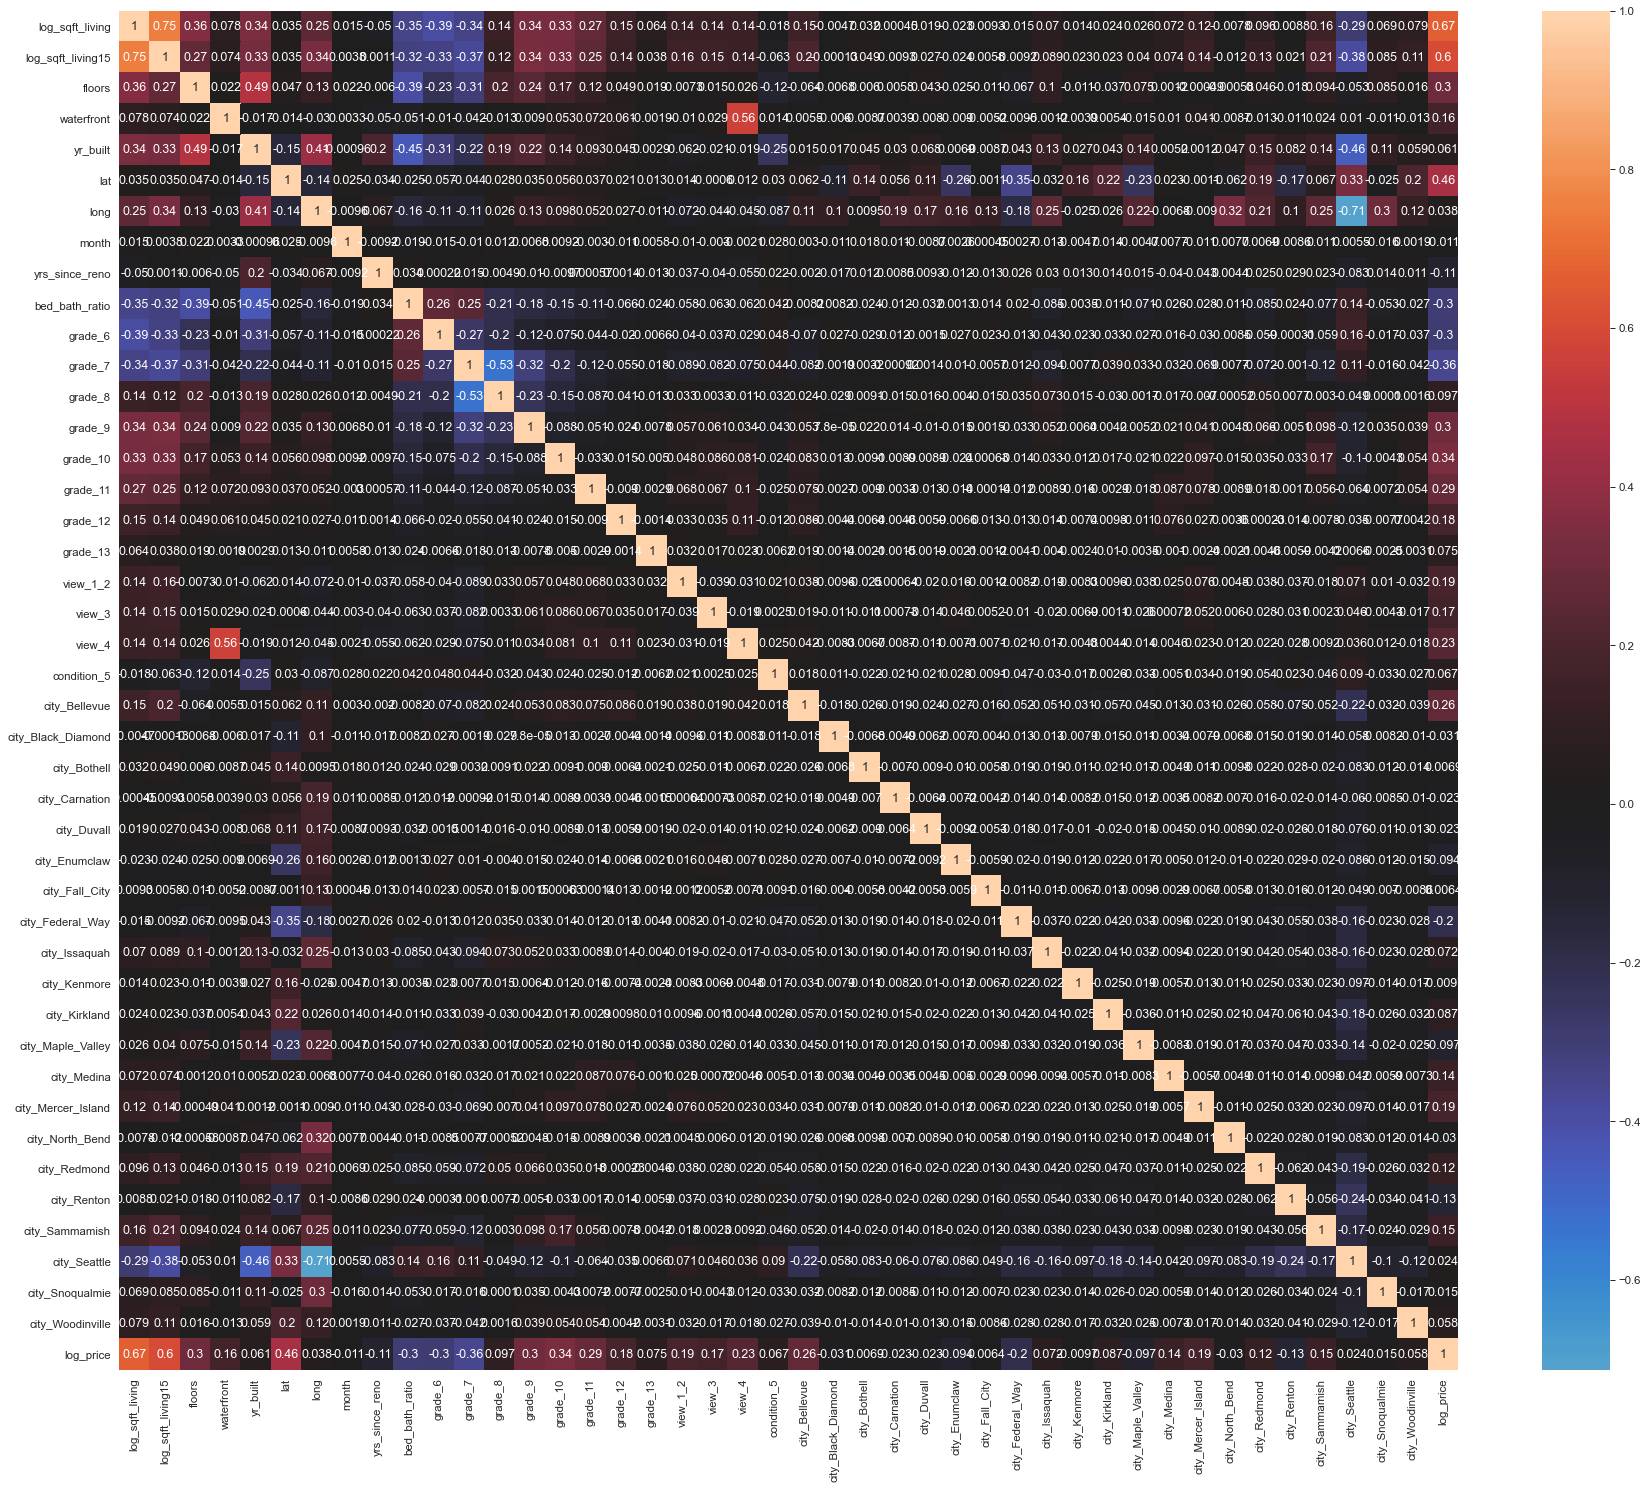

In [59]:
corr = pd.concat([X_train, Y_train], axis=1).corr()
plt.figure(figsize=(30,25))
sns.heatmap(data = corr, center= 0, annot= True)

### Normality check

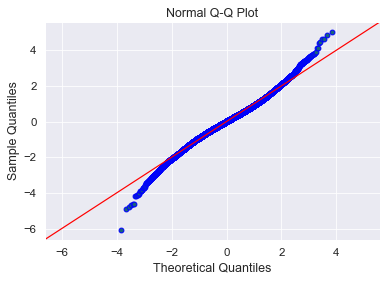

In [60]:
resid7 = model7.resid
color = {'markerfacecolor': '#18637b'}
fig = sm.graphics.qqplot(resid7, dist=stats.norm, line='45', fit=True, **color)
plt.title('Normal Q-Q Plot')
plt.savefig('images/final-qq.png')

### Homoscedasticity check

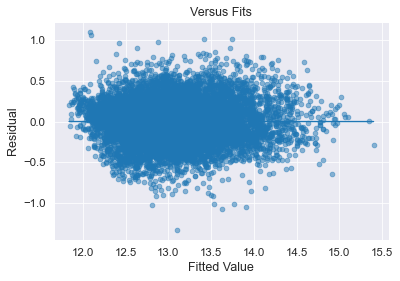

In [61]:

plt.scatter(model7.predict(train2[x_cols]), model7.resid, alpha=0.5)
plt.plot(model7.predict(train2[x_cols]), [0 for i in range(len(train2))])
plt.title('Versus Fits')
plt.xlabel('Fitted Value')
plt.ylabel('Residual')
plt.savefig('images/final-homosc.png')

## Test Case: Reducing bed-bath ratio for homes in Renton
I wanted to see the model in action, so I chose to perform a sample renovation on 23 homes in the dataset to see how the relevant coefficient can be recovered. I did this by reducing the bed-bath ratio of 23 homes in Renton from 4 to 2. These homes also happened to have 1 bathroom, which means that we went from 4 to 2 bedrooms in all homes. This could be the equivalent of merging bedrooms together or knocking out a bedroom to create more living area space. If these homes were being evaluated in 2021 (this year), these additional years would need to be added to `yrs_since_reno`. `yr_sold` is still a necessary piece of data in order to calculate this, even though it isn't fed into the model. We will leave this alone for this test case and assume the predictions are being made in 2014 or 2015, using the original `yrs_since_reno` data.

In [62]:
df_fin['city'].value_counts()

Seattle          8774
Renton           1568
Bellevue         1390
Kent             1185
Redmond           969
Kirkland          968
Auburn            893
Sammamish         791
Federal Way       764
Issaquah          728
Maple Valley      577
Woodinville       465
Snoqualmie        299
Kenmore           281
Mercer Island     281
Enumclaw          212
North Bend        211
Bothell           193
Duvall            181
Carnation         109
Vashon            102
Black Diamond      96
Fall City          74
Medina             47
Name: city, dtype: int64

In [63]:
Renton = df_fin[df_fin['city'] == 'Renton']

In [64]:
Renton.describe()

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,lat,long,...,city_Medina,city_Mercer_Island,city_North_Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
count,1.568000e+03,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,1568.000000,...,1568.0,1568.0,1568.0,1568.0,1568.0,1568.0,1568.0,1568.0,1568.0,1568.0
mean,4.064170e+05,2.141741,2111.049107,13035.136480,1.472577,0.003189,1980.109694,98057.287628,47.478295,-122.162849,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
std,2.001651e+05,0.702437,820.565921,23221.607839,0.497807,0.056397,22.571720,1.514718,0.030860,0.031832,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.260000e+05,1.000000,460.000000,1436.000000,1.000000,0.000000,1900.000000,98055.000000,47.391700,-122.232000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
25%,2.945525e+05,1.750000,1510.000000,6500.000000,1.000000,0.000000,1964.000000,98056.000000,47.451300,-122.188000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
50%,3.599500e+05,2.250000,2000.000000,8099.500000,1.000000,0.000000,1980.000000,98058.000000,47.480400,-122.166000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
75%,4.612500e+05,2.500000,2600.000000,10768.500000,2.000000,0.000000,2001.000000,98059.000000,47.501525,-122.144000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
max,3.000000e+06,5.500000,7320.000000,262018.000000,3.000000,1.000000,2015.000000,98059.000000,47.545400,-122.063000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [65]:
Renton[(Renton['bed_bath_ratio'] == 4.0) & (Renton['bedrooms_5plus'] == 0.0)]

,price,bathrooms,sqft_living,sqft_lot,floors,waterfront,yr_built,zipcode,lat,long,...,city_Medina,city_Mercer_Island,city_North_Bend,city_Redmond,city_Renton,city_Sammamish,city_Seattle,city_Snoqualmie,city_Vashon,city_Woodinville
1867,330000.0,1.0,1100,5000,1.5,0.0,1904,98055,47.4868,-122.204,...,0,0,0,0,1,0,0,0,0,0
2178,327000.0,1.0,1620,6000,1.5,0.0,1905,98055,47.4763,-122.206,...,0,0,0,0,1,0,0,0,0,0
2684,278500.0,1.0,1540,8400,1.0,0.0,1971,98058,47.4278,-122.152,...,0,0,0,0,1,0,0,0,0,0
5079,270000.0,1.0,1900,8505,1.0,0.0,1956,98055,47.4406,-122.196,...,0,0,0,0,1,0,0,0,0,0
5410,345000.0,1.0,1980,7991,1.5,0.0,1962,98058,47.4604,-122.170,...,0,0,0,0,1,0,0,0,0,0
6105,277000.0,1.0,1500,5750,1.5,0.0,1925,98055,47.4768,-122.206,...,0,0,0,0,1,0,0,0,0,0
7713,299950.0,1.0,1170,5400,1.0,0.0,1953,98056,47.4920,-122.172,...,0,0,0,0,1,0,0,0,0,0
7753,205000.0,1.0,1030,6621,1.0,0.0,1955,98055,47.4857,-122.221,...,0,0,0,0,1,0,0,0,0,0
7771,200000.0,1.0,1350,11507,1.0,0.0,1966,98055,47.4269,-122.197,...,0,0,0,0,1,0,0,0,0,0
8702,261490.0,1.0,1640,8467,1.0,0.0,1943,98056,47.4894,-122.188,...,0,0,0,0,1,0,0,0,0,0


In [66]:
Before = Renton[(Renton['bed_bath_ratio'] == 4) & (Renton['bedrooms_5plus'] == 0.0)]

In [67]:
After = Renton[(Renton['bed_bath_ratio'] == 4) & (Renton['bedrooms_5plus'] == 0.0)]

In [68]:
After['bed_bath_ratio'] = After['bed_bath_ratio'] - 2.0

In [69]:
to_log = ['price', 'sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15']

# log transform train data
df_log = pd.DataFrame([])
for col in to_log:
    df_log[col] = np.log(After[col])
df_log = df_log.add_prefix('log_')
df_temp = After.drop(to_log, axis=1)
After = pd.concat([df_log, df_temp], axis=1)

In [70]:
After.columns

Index(['log_price', 'log_sqft_living', 'log_sqft_lot', 'log_sqft_living15',
       'log_sqft_lot15', 'bathrooms', 'floors', 'waterfront', 'yr_built',
       'zipcode', 'lat', 'long', 'month', 'yrs_since_reno', 'bed_bath_ratio',
       'bedrooms_5plus', 'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9',
       'grade_10', 'grade_11', 'grade_12', 'grade_13', 'view_1_2', 'view_3',
       'view_4', 'condition_3_4', 'condition_5', 'city', 'city_Bellevue',
       'city_Black_Diamond', 'city_Bothell', 'city_Carnation', 'city_Duvall',
       'city_Enumclaw', 'city_Fall_City', 'city_Federal_Way', 'city_Issaquah',
       'city_Kenmore', 'city_Kent', 'city_Kirkland', 'city_Maple_Valley',
       'city_Medina', 'city_Mercer_Island', 'city_North_Bend', 'city_Redmond',
       'city_Renton', 'city_Sammamish', 'city_Seattle', 'city_Snoqualmie',
       'city_Vashon', 'city_Woodinville'],
      dtype='object')

In [71]:
cols = list(After.columns)
unwanted = ['log_price', 'zipcode', 'city', 'bedrooms_5plus', 'grade_5', 'city_Kent', 'bathrooms', 'log_sqft_lot15',
            'condition_3_4', 'log_sqft_lot', 'city_Vashon']
x_cols = [e for e in cols if e not in unwanted]

In [73]:
After_Y_pred = linreg7.predict(After[x_cols])

In [74]:
compare = pd.DataFrame([])
compare['After_logprice'] = After_Y_pred

In [75]:
compare['After_price'] = np.exp(compare['After_logprice'])
compare['Before_price'] = np.array(Before['price'])

In [76]:
compare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   After_logprice  23 non-null     float64
 1   After_price     23 non-null     float64
 2   Before_price    23 non-null     float64
dtypes: float64(3)
memory usage: 680.0 bytes


In [77]:
compare.head()

,After_logprice,After_price,Before_price
0,12.727290,336815.285422,330000.0
1,12.902193,401190.933187,327000.0
2,12.533915,277593.956711,278500.0
3,12.659608,314773.410943,270000.0
4,12.748683,344098.260120,345000.0


In [78]:
compare['diff'] = compare['After_price'] - compare['Before_price']
compare['percent_inc'] = compare['diff']/compare['Before_price']
compare.describe()

,After_logprice,After_price,Before_price,diff,percent_inc
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,12.624507,305551.259363,296577.826087,8973.433277,0.069622
std,0.105974,32523.232188,67290.947585,65151.486886,0.210157
min,12.361828,233708.035415,180000.000000,-203031.428298,-0.406063
25%,12.593054,294506.741143,263245.000000,-7073.799674,-0.022118
50%,12.635571,307297.431582,282500.000000,27747.801046,0.098222
75%,12.658454,314410.548369,324500.000000,47523.292379,0.181813
max,12.902193,401190.933187,500000.000000,115298.935926,0.640550


The mean for `percent_inc` is 6.96%. This means that for a 2 unit decrease in bed_bath_ratio, there is a 6.96% increase in price with a standard deviation of 21%. This works out to be a 3.48% increase in price per unit decrease in bed_bath_ratio. Our coefficient for bed_bath_ratio was -0.0486, which suggests that a 4.86% increase in price could be achieved by a one unit decrease in bed_bath_ratio. Our recovered unit increase is in the same ballpark as the coefficient for the model.

In [ ]:
compare['percent_inc_price'] = compare['diff']/compare['Before_price']
compare['percent_inc_sqftliving'] = compare['sqft_living_diff']/compare['Before_sqftliving']